<a href="https://colab.research.google.com/github/Baegeonwoo/Baegeonwoo/blob/main/stock_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #고성능의 수치계산을 위해 사용
import pandas as pd # 데이터 프레임 생성, 삭제 , 수정 등을 하기 위해 사용

import pandas_datareader.data as web # 주식 데이터를 얻어오기 위해 사용
import yfinance as yfin # 야후 파이낸스에서 크롤링한 데이터를 제공하는 라이브러리
import datetime # 시간 처리
import matplotlib.pyplot as plt # 간편하게 그래프를 그리기 위해 사용

%matplotlib inline
# 애니메이션이나 그래프 와 같은 시각적 자료를 바로 보기 위해 사용

# 데이터를 가져오고 나서, 이동평균을 구해야함.

# 분석 시기 (2020.01.02) ~ (2023.06.07)
start = datetime.datetime( 2020, 1, 2 )
end = datetime.datetime( 2023, 7, 11)

In [ ]:

def makeStockChart( code, sDay=start, eDay=end
                   ,*args, **kwargs):

  # 이 함수는 종목코드와 조회시작일 sDay, 종료일 eDay 을 넣으면 차트를 그려준다.

  # 야후 파이낸스에서 종목코드와 분석 기간에 대한 데이터 가져오기
  yfin.pdr_override()
  datas = web.get_data_yahoo( code, sDay, eDay) #datas 리스트 생성( pandas datareader 라이브러리 사용 )


  tmp = datas['Adj Close'] # 변수 tmp에 datas리스트의 Adj Close열의 값을 저장
  datas['5MA'] = tmp.rolling( window=5 ).mean() # datas리스트의 5MA열에 tmp변수의 '5'만큼 이동하는 값의 평균값(이동평균값)을 저장
  datas['20MA'] = tmp.rolling( window=20 ).mean() # datas리스트의 5MA열에 tmp변수의 '20'만큼 이동하는 값의 평균값(이동평균값)을 저장
  datas['60MA'] = tmp.rolling( window=60 ).mean() # datas리스트의 5MA열에 tmp변수의 '60'만큼 이동하는 값의 평균값(이동평균값)을 저장
  datas['120MA'] = tmp.rolling( window=120 ).mean() # datas리스트의 5MA열에 tmp변수의 '120'만큼 이동하는 값의 평균값(이동평균값)을 저장

  #차트그리기
  plt.figure (  figsize=(12, 6) ) # 차트의 크기를 정하는 함수로, 가로 12, 세로 6의 크기로 생성
  plt.plot( datas.Close,   label='Close' ) # 지정된 라벨을 사용한 위의 특정 변수에 관한 그래프를 그림
  plt.plot(datas['5MA'],    label='5MA')
  plt.plot(datas['20MA'],   label='20MA')
  plt.plot(datas['60MA'],   label='60MA')
  plt.plot(datas['120MA'],   label='120MA')
  plt.title(f"{code}'s stock chart") # 차트의 제목을 {code}'s stock chart 로 하는데 이 f"{code}"는 지역 변수 code를 포맷팅 하는 것
  plt.legend() #범례를 작성
  plt.show() # 차트를 보여줌

[*********************100%***********************]  1 of 1 completed


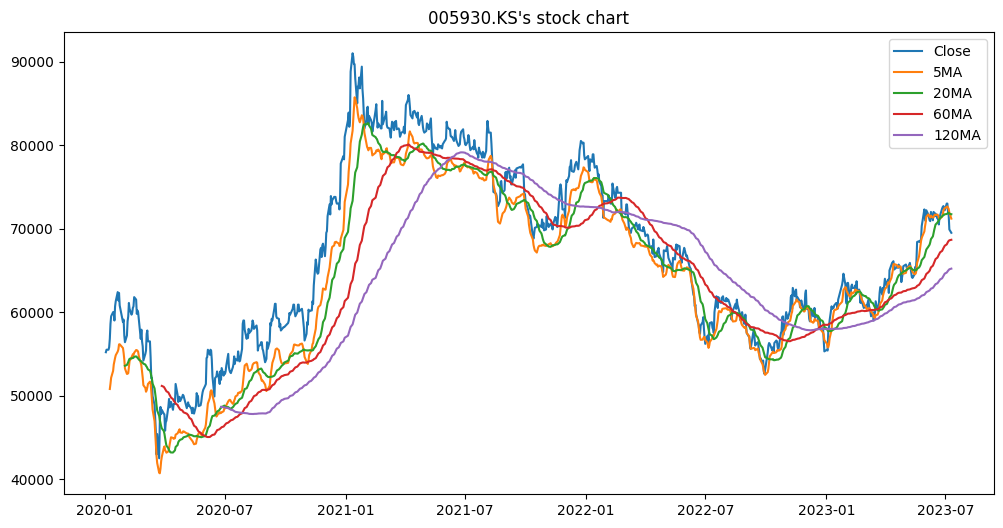

In [ ]:
samsung_code = "005930.KS" #삼성 주식의 종목코드
makeStockChart( code=samsung_code) #삼성 주식의 차트를 나타냄

In [ ]:
# 데이터 가져오기
yfin.pdr_override()
datas = web.get_data_yahoo( samsung_code, start, end) # 삼성 주식 데이터 가져오기


# dic 딕셔너리 선언, key값 ds : value값 datas.index(?) / key값 y : value값 datas.Close(?)

dic = {
    'ds' : datas.index,
    'y' : datas.Close
}

# 변수df에 ds 와 y를 key값으로 갖는 데이터 프레임을 저장
df = pd.DataFrame( dic )

# 위에 저장된 데이터 프레임에서 인덱스를 재설정함
df.reset_index( inplace=True )

del df['Date'] #df 데이터 프레임에서 Date열의 데이터를 삭제시킴 (ds와 중복되어서)

# df데이터 프레임의 0~4번째의 행을 출력함
df.head(5)

[*********************100%***********************]  1 of 1 completed


,ds,y
0,2020-01-02,55200.0
1,2020-01-03,55500.0
2,2020-01-06,55500.0
3,2020-01-07,55800.0
4,2020-01-08,56800.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpygieq13p/9e512inx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygieq13p/v611i2c9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52720', 'data', 'file=/tmp/tmpygieq13p/9e512inx.json', 'init=/tmp/tmpygieq13p/v611i2c9.json', 'output', 'file=/tmp/tmpygieq13p/prophet_modelup6jm_4o/prophet_model-20230712041915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:19:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:19:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


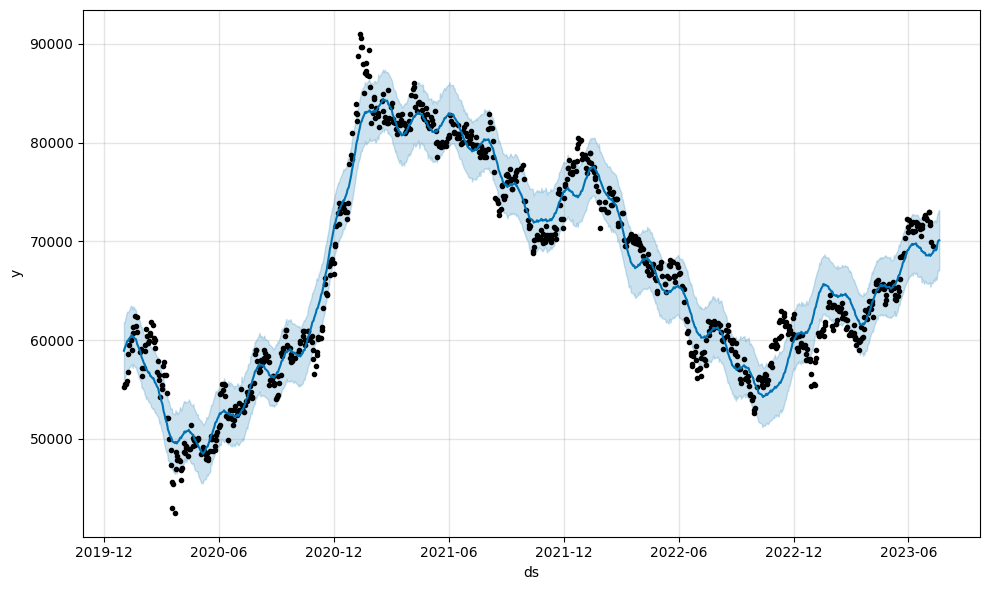

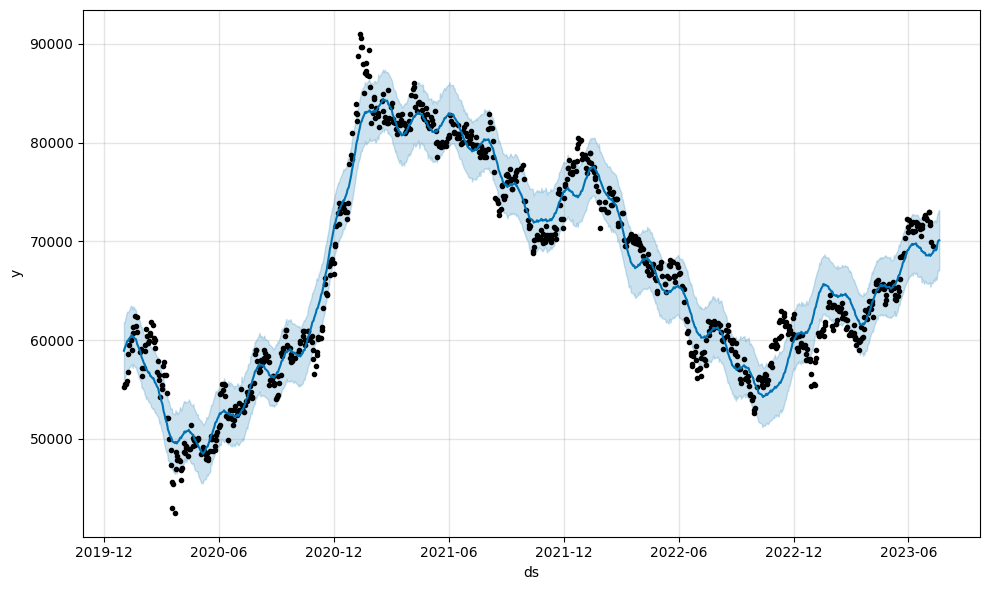

In [ ]:
# prophet (시계열 에측) 모듈 세팅
from prophet import Prophet

# 일 단위로 데이터가 구성되어 있어서, 일 단위 주기성 활성화
model = Prophet( daily_seasonality=True )

# 학습 시작
model.fit( df )

# 주가 예측 위한 날짜 데이터 설정 / 향후 10일치 예측값
future = model.make_future_dataframe( periods=10 )

# 주가 예측
forecast = model.predict( future )


# 필요한 key값만 보기
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11)

# 시각적 자료 출력
model.plot(forecast)

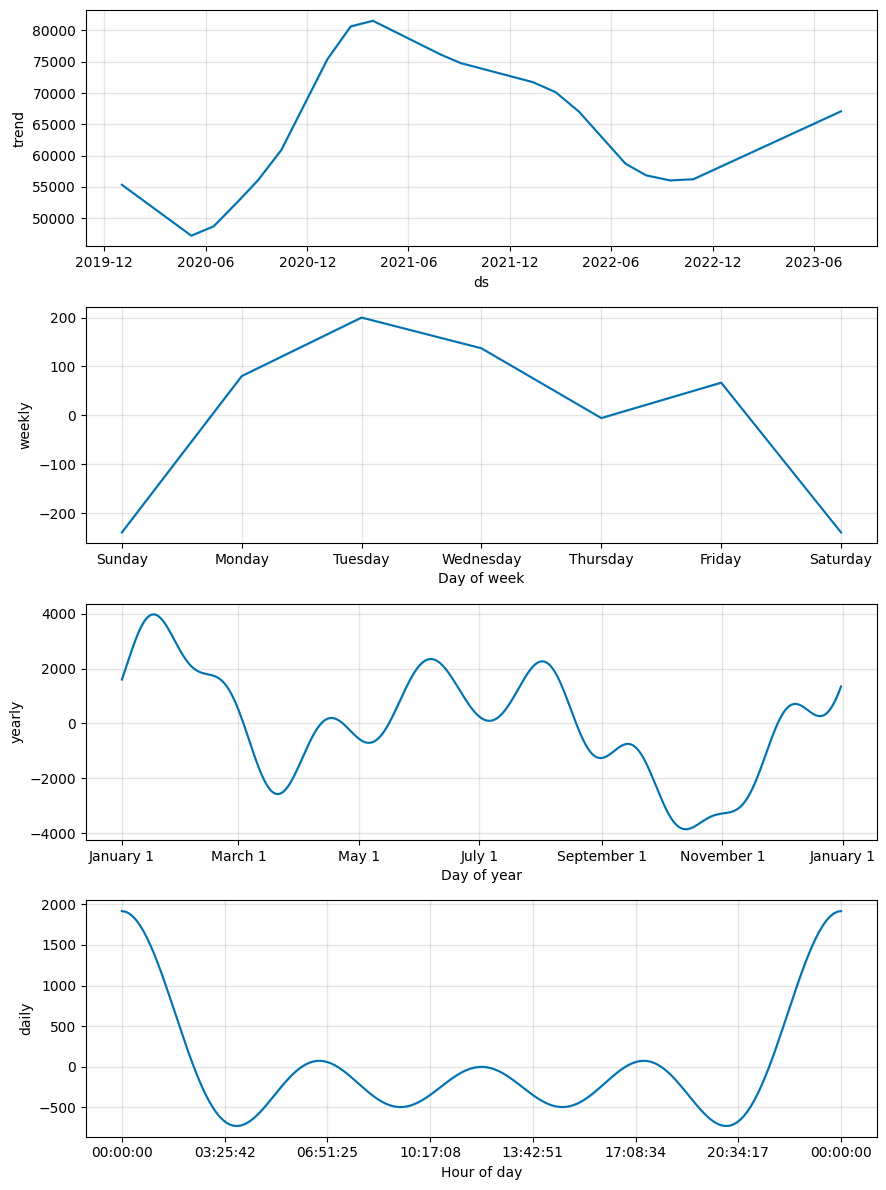

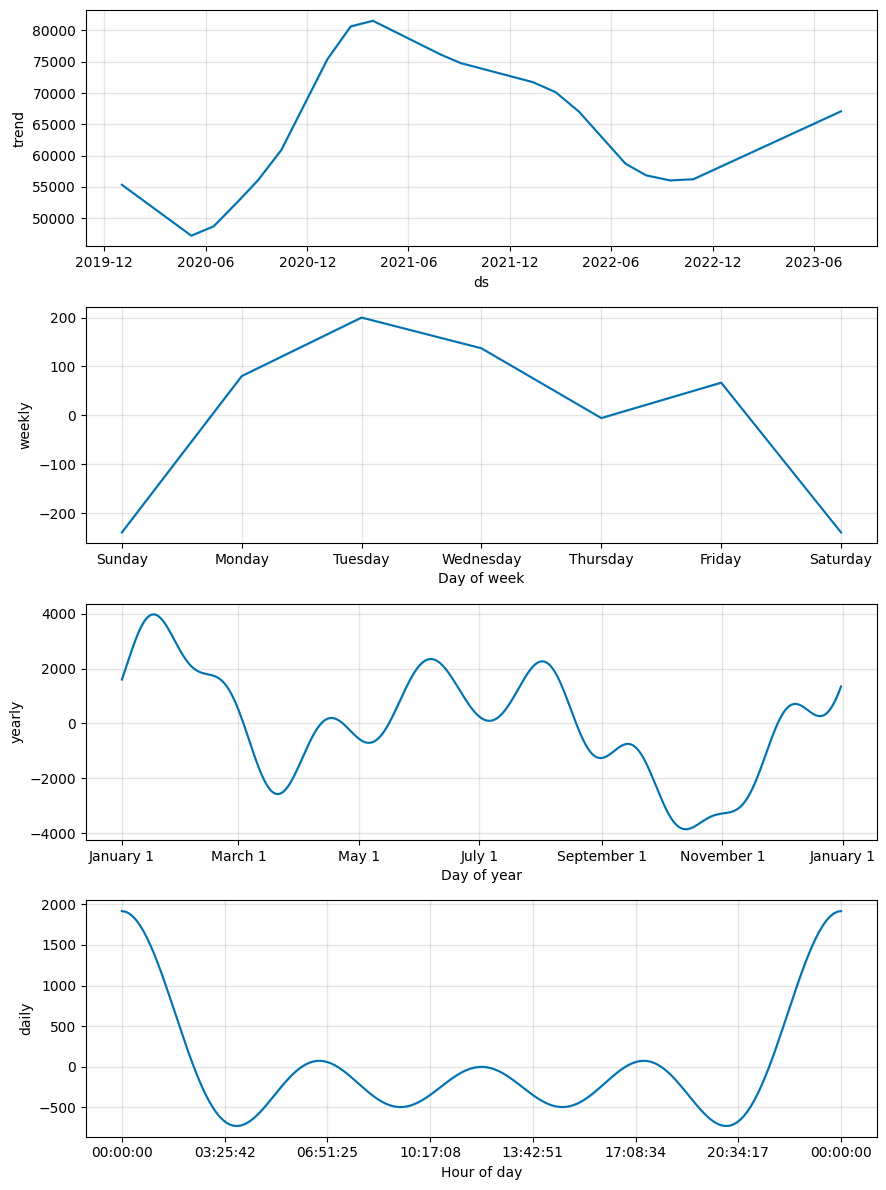

In [ ]:
model.plot_components( forecast )